---

# Flipkart Television Data Analysis 

---

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

---

## Web Scraping the Data

---

In [2]:
url = "https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response.text[1:100]

'!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><'

In [6]:
response.content[1:100]

b'!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><'

In [7]:
pagecontent = response.text

In [8]:
soup = BeautifulSoup(pagecontent,"html.parser")

In [9]:
pname = soup.find("div",attrs={"class":"KzDlHZ"})

In [10]:
pname

<div class="KzDlHZ">realme TechLife 80 cm (32 inch) QLED HD Ready Smart Google TV 2025 Edition</div>

In [11]:
productname = []

for x in soup.find_all("div",attrs={"class":"KzDlHZ"}):
    productname.append(x.text if x else np.nan)

for name in productname:
    print(name)

realme TechLife 80 cm (32 inch) QLED HD Ready Smart Google TV 2025 Edition
Foxsky 80 cm (32 inch) HD Ready LED Smart Android TV
Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K) LED Smart Google TV 2025 Edition with Dolby Audio | 32 ...
Coocaa S4U Plus 80 cm (32 inch) HD Ready LED Smart Coolita TV 2025 Edition with Dolby Audio | Narrow F...
Blaupunkt Quantum Dot 100 cm (40 inch) QLED Full HD Smart Android TV 2025 Edition with 48W Sound Outpu...
Samsung 80 cm (32 inch) HD Ready LED Smart Tizen TV 2025 Edition with Voice Assistance Remote Control ...
Infinix 80 cm (32 inch) HD Ready LED Smart Linux TV
MarQ by Flipkart 60 cm (24 inch) HD Ready LED TV
Coocaa S4U Pro 80 cm (32 inch) HD Ready LED Smart Coolita TV 2025 Edition with Dolby Audio | 20W Speak...
BESTON 101 cm (40 inch) Full HD LED Smart Android TV 2025 Edition
Foxsky 60 cm (24 inch) HD Ready LED TV
Foxsky 109 cm (43 inch) Full HD LED Smart Android TV
MarQ by Flipkart 80 cm (32 inch) HD Ready LED TV
MOTOROLA 80 cm (32 inch) QLED HD R

In [12]:
rating = []

for x in soup.find_all("div",attrs={"class":"XQDdHH"}):
    rating.append(x.text if x else np.nan)

for name in rating:
    print(name)

4.3
4.1
4
3.9
4.4
4.3
4.2
4.2
4.1
3.8
4
4.1
4.2
4.3
4.1
3.8
4.4
4.1
4.4
4.3
4.3
4
3.9
3.8
3.9
4
4
4.3
4
4
4
5
5
3.9
3
5
4.2
5
5


In [13]:
price = []

for x in soup.find_all("div",attrs={"class":"Nx9bqj _4b5DiR"}):
    price.append(x.text if x else np.nan)

for name in price:
    print(name)

₹9,999
₹6,999
₹21,999
₹7,299
₹13,799
₹13,490
₹7,999
₹4,749
₹7,699
₹11,999
₹4,799
₹11,499
₹6,749
₹10,490
₹11,499
₹7,499
₹13,990
₹5,499
₹25,499
₹38,999
₹20,999
₹12,490
₹17,999
₹7,300


In [14]:
for i in range(1,51):
    url = f"https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    print(url)

https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8
https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&ma

In [15]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

productname = [] 
price = []
rating = []
features = []
pagenum = []
original_price = []
Discount = []
Discount_Price = []
Review = []

total_time = time.time()

for i in range(1, 51): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'yKfJKb row'}):
        pname = x.find('div', attrs={'class':'KzDlHZ'})
        cost = x.find('div', attrs={'class':'Nx9bqj _4b5DiR'})   # discounted price
        rat = x.find('div', attrs={'class':'XQDdHH'})
        specs = x.find('div', attrs={'class':'_6NESgJ'})
        op = x.find('div', attrs={'class':'yRaY8j ZYYwLA'})
        discount = x.find('div', attrs={'class':'UkUFwK'})
        dp = x.find('div',attrs={'class':'Nx9bqj _4b5DiR'})
        reviews = x.find('span', attrs={'class':'Wphh3N'})
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Discount_Price.append(dp.text if dp else np.nan)
        Review.append(reviews.text if reviews else np.nan)
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))


Page 1 completed in 0.47 seconds
Page 2 completed in 0.42 seconds
Page 3 completed in 0.42 seconds
Page 4 completed in 0.57 seconds
Page 5 completed in 0.58 seconds
Page 6 completed in 0.46 seconds
Page 7 completed in 0.58 seconds
Page 8 completed in 0.42 seconds
Page 9 completed in 0.46 seconds
Page 10 completed in 0.54 seconds
Page 11 completed in 0.68 seconds
Page 12 completed in 0.59 seconds
Page 13 completed in 0.76 seconds
Page 14 completed in 0.44 seconds
Page 15 completed in 0.56 seconds
Page 16 completed in 0.67 seconds
Page 17 completed in 0.42 seconds
Page 18 completed in 0.44 seconds
Page 19 completed in 0.60 seconds
Page 20 completed in 0.49 seconds
Page 21 completed in 0.55 seconds
Page 22 completed in 0.77 seconds
Page 23 completed in 0.53 seconds
Page 24 completed in 0.42 seconds
Page 25 completed in 0.52 seconds
Page 26 completed in 0.58 seconds
Page 27 completed in 0.46 seconds
Page 28 completed in 0.45 seconds
Page 29 completed in 0.62 seconds
Page 30 completed in 0.

In [16]:
tv_df = pd.DataFrame({"product_name":productname,"Price":price,"rating":rating,"features":features,"pagenum":pagenum,"original_price":original_price,"Discount":Discount,"Discount_Price":Discount_Price,"Review":Review})

In [17]:
tv_df

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,"₹23,999",58% off,"₹9,999","12,579 Ratings & 1,020 Reviews"
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,"₹6,999",4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,"₹22,499",68% off,"₹6,999","13,114 Ratings & 2,569 Reviews"
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,"₹21,999",4,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,"₹54,999",60% off,"₹21,999",494 Ratings & 48 Reviews
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,"₹7,299",3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,"₹13,999",47% off,"₹7,299","2,514 Ratings & 199 Reviews"
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,"₹13,799",4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,"₹19,999",31% off,"₹13,799","12,724 Ratings & 2,959 Reviews"
...,...,...,...,...,...,...,...,...,...
955,Samsung 109.22 cm (43 inch) QLED Ultra HD (4K)...,"₹43,935",4.7,Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...,41,"₹63,500",30% off,"₹43,935",6 Ratings & 1 Reviews
956,Thomson NeoX 139 cm (55 inch) QLED Ultra HD (4...,"₹31,999",NaN,Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...,41,"₹49,999",36% off,"₹31,999",NaN
957,BPL 4301 80 cm (32 inch) HD Ready LED Smart An...,"₹13,999",4.2,HD Ready | LEDModel ID: 32H-A4301Launch Year: ...,41,"₹27,000",48% off,"₹13,999",28 Ratings & 1 Reviews
958,Panasonic PS 80 cm (32 inch) HD Ready LED Smar...,"₹14,400",NaN,HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...,41,"₹21,990",34% off,"₹14,400",NaN


In [18]:
tv_df.to_csv("tv.csv",index=False)

---

## EDA Using Pandas

---

In [19]:
df = pd.read_csv("tv.csv")

In [20]:
df

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,"₹23,999",58% off,"₹9,999","12,579 Ratings & 1,020 Reviews"
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,"₹6,999",4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,"₹22,499",68% off,"₹6,999","13,114 Ratings & 2,569 Reviews"
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,"₹21,999",4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,"₹54,999",60% off,"₹21,999",494 Ratings & 48 Reviews
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,"₹7,299",3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,"₹13,999",47% off,"₹7,299","2,514 Ratings & 199 Reviews"
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,"₹13,799",4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,"₹19,999",31% off,"₹13,799","12,724 Ratings & 2,959 Reviews"
...,...,...,...,...,...,...,...,...,...
955,Samsung 109.22 cm (43 inch) QLED Ultra HD (4K)...,"₹43,935",4.7,Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...,41,"₹63,500",30% off,"₹43,935",6 Ratings & 1 Reviews
956,Thomson NeoX 139 cm (55 inch) QLED Ultra HD (4...,"₹31,999",NaN,Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...,41,"₹49,999",36% off,"₹31,999",NaN
957,BPL 4301 80 cm (32 inch) HD Ready LED Smart An...,"₹13,999",4.2,HD Ready | LEDModel ID: 32H-A4301Launch Year: ...,41,"₹27,000",48% off,"₹13,999",28 Ratings & 1 Reviews
958,Panasonic PS 80 cm (32 inch) HD Ready LED Smar...,"₹14,400",NaN,HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...,41,"₹21,990",34% off,"₹14,400",NaN


In [21]:
df.shape

(960, 9)

In [22]:
df.dtypes

product_name       object
Price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Discount_Price     object
Review             object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    object 
 2   rating          742 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  955 non-null    object 
 6   Discount        955 non-null    object 
 7   Discount_Price  960 non-null    object 
 8   Review          742 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 67.6+ KB


---

## Removing null values

---

In [24]:
df.isnull().sum()

product_name        0
Price               0
rating            218
features            0
pagenum             0
original_price      5
Discount            5
Discount_Price      0
Review            218
dtype: int64

In [25]:
df["rating"].fillna(df["rating"].mode()[0],inplace=True)

In [26]:
df["original_price"].fillna(df["original_price"].mode()[0],inplace=True)

In [27]:
df["Discount"].fillna(df["Discount"].mode()[0],inplace=True)

In [28]:
df["Review"].fillna(df["Review"].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

product_name      0
Price             0
rating            0
features          0
pagenum           0
original_price    0
Discount          0
Discount_Price    0
Review            0
dtype: int64

---

## Checking duplicates

---

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.head(5)

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,"₹23,999",58% off,"₹9,999","12,579 Ratings & 1,020 Reviews"
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,"₹6,999",4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,"₹22,499",68% off,"₹6,999","13,114 Ratings & 2,569 Reviews"
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,"₹21,999",4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,"₹54,999",60% off,"₹21,999",494 Ratings & 48 Reviews
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,"₹7,299",3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,"₹13,999",47% off,"₹7,299","2,514 Ratings & 199 Reviews"
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,"₹13,799",4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,"₹19,999",31% off,"₹13,799","12,724 Ratings & 2,959 Reviews"


In [32]:
df["product_name"][0]

'realme TechLife 80 cm (32 inch) QLED HD Ready Smart Google TV 2025 Edition'

---

## Using Regex() functions

---

In [33]:
df["Brand"] = df["product_name"].apply(lambda x:re. findall(r"^\w+",x)[0])

In [34]:
df

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,"₹23,999",58% off,"₹9,999","12,579 Ratings & 1,020 Reviews",realme
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,"₹6,999",4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,"₹22,499",68% off,"₹6,999","13,114 Ratings & 2,569 Reviews",Foxsky
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,"₹21,999",4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,"₹54,999",60% off,"₹21,999",494 Ratings & 48 Reviews,Coocaa
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,"₹7,299",3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,"₹13,999",47% off,"₹7,299","2,514 Ratings & 199 Reviews",Coocaa
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,"₹13,799",4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,"₹19,999",31% off,"₹13,799","12,724 Ratings & 2,959 Reviews",Blaupunkt
...,...,...,...,...,...,...,...,...,...,...
955,Samsung 109.22 cm (43 inch) QLED Ultra HD (4K)...,"₹43,935",4.7,Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...,41,"₹63,500",30% off,"₹43,935",6 Ratings & 1 Reviews,Samsung
956,Thomson NeoX 139 cm (55 inch) QLED Ultra HD (4...,"₹31,999",4.3,Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...,41,"₹49,999",36% off,"₹31,999","80,627 Ratings & 6,041 Reviews",Thomson
957,BPL 4301 80 cm (32 inch) HD Ready LED Smart An...,"₹13,999",4.2,HD Ready | LEDModel ID: 32H-A4301Launch Year: ...,41,"₹27,000",48% off,"₹13,999",28 Ratings & 1 Reviews,BPL
958,Panasonic PS 80 cm (32 inch) HD Ready LED Smar...,"₹14,400",4.3,HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...,41,"₹21,990",34% off,"₹14,400","80,627 Ratings & 6,041 Reviews",Panasonic


In [35]:
df["Brand"].value_counts().head()

Brand
Samsung    148
LG          81
TCL         64
SONY        54
Hisense     48
Name: count, dtype: int64

In [36]:
df["features"]

0      HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...
1      HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...
2      Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...
3      HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...
4      Full HD | QLEDModel ID: 40QD7070Launch Year: 2...
                             ...                        
955    Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...
956    Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...
957    HD Ready | LEDModel ID: 32H-A4301Launch Year: ...
958    HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...
959    Ultra HD (4K) | LEDModel ID: 55P6KLaunch Year:...
Name: features, Length: 960, dtype: object

In [37]:
df["features"].apply(lambda x: re.findall(r"^(.*?)(?:\s*\|\s*)", x)[0])

0           HD Ready
1           HD Ready
2      Ultra HD (4K)
3           HD Ready
4            Full HD
           ...      
955    Ultra HD (4K)
956    Ultra HD (4K)
957         HD Ready
958         HD Ready
959    Ultra HD (4K)
Name: features, Length: 960, dtype: object

In [38]:
df["screen"] = df["features"].apply(lambda x: re.findall(r"^(.*?)(?:\s*\|\s*)", x)[0])

In [39]:
df

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand,screen
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,"₹9,999",4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,"₹23,999",58% off,"₹9,999","12,579 Ratings & 1,020 Reviews",realme,HD Ready
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,"₹6,999",4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,"₹22,499",68% off,"₹6,999","13,114 Ratings & 2,569 Reviews",Foxsky,HD Ready
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,"₹21,999",4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,"₹54,999",60% off,"₹21,999",494 Ratings & 48 Reviews,Coocaa,Ultra HD (4K)
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,"₹7,299",3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,"₹13,999",47% off,"₹7,299","2,514 Ratings & 199 Reviews",Coocaa,HD Ready
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,"₹13,799",4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,"₹19,999",31% off,"₹13,799","12,724 Ratings & 2,959 Reviews",Blaupunkt,Full HD
...,...,...,...,...,...,...,...,...,...,...,...
955,Samsung 109.22 cm (43 inch) QLED Ultra HD (4K)...,"₹43,935",4.7,Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...,41,"₹63,500",30% off,"₹43,935",6 Ratings & 1 Reviews,Samsung,Ultra HD (4K)
956,Thomson NeoX 139 cm (55 inch) QLED Ultra HD (4...,"₹31,999",4.3,Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...,41,"₹49,999",36% off,"₹31,999","80,627 Ratings & 6,041 Reviews",Thomson,Ultra HD (4K)
957,BPL 4301 80 cm (32 inch) HD Ready LED Smart An...,"₹13,999",4.2,HD Ready | LEDModel ID: 32H-A4301Launch Year: ...,41,"₹27,000",48% off,"₹13,999",28 Ratings & 1 Reviews,BPL,HD Ready
958,Panasonic PS 80 cm (32 inch) HD Ready LED Smar...,"₹14,400",4.3,HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...,41,"₹21,990",34% off,"₹14,400","80,627 Ratings & 6,041 Reviews",Panasonic,HD Ready


In [40]:
df["screen"].value_counts()

screen
Ultra HD (4K)    645
HD Ready         200
Full HD          107
Ultra HD (8K)      8
Name: count, dtype: int64

In [41]:
df["Price"]

0       ₹9,999
1       ₹6,999
2      ₹21,999
3       ₹7,299
4      ₹13,799
        ...   
955    ₹43,935
956    ₹31,999
957    ₹13,999
958    ₹14,400
959    ₹32,732
Name: Price, Length: 960, dtype: object

In [42]:
df["Price"] = df["Price"].apply(lambda x:x[1:])

In [43]:
df["Price"]

0       9,999
1       6,999
2      21,999
3       7,299
4      13,799
        ...  
955    43,935
956    31,999
957    13,999
958    14,400
959    32,732
Name: Price, Length: 960, dtype: object

In [44]:
df["Price"] = df["Price"].apply(lambda x:re.sub(r",","",x))

In [45]:
df["Price"]

0       9999
1       6999
2      21999
3       7299
4      13799
       ...  
955    43935
956    31999
957    13999
958    14400
959    32732
Name: Price, Length: 960, dtype: object

In [46]:
df["Price"] = df["Price"].astype("int")

In [47]:
df.dtypes

product_name       object
Price               int64
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Discount_Price     object
Review             object
Brand              object
screen             object
dtype: object

In [48]:
df["original_price"] = df["original_price"].apply(lambda x:x[1:])

In [49]:
df["original_price"] = df["original_price"].apply(lambda x:re.sub(r",","",x))

In [50]:
df["original_price"]

0      23999
1      22499
2      54999
3      13999
4      19999
       ...  
955    63500
956    49999
957    27000
958    21990
959    77990
Name: original_price, Length: 960, dtype: object

In [51]:
df['original_price'] = df["original_price"].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    object 
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 82.6+ KB


In [53]:
df['Discount_Price']

0       ₹9,999
1       ₹6,999
2      ₹21,999
3       ₹7,299
4      ₹13,799
        ...   
955    ₹43,935
956    ₹31,999
957    ₹13,999
958    ₹14,400
959    ₹32,732
Name: Discount_Price, Length: 960, dtype: object

In [54]:
df["Discount_Price"] = df["Discount_Price"].apply(lambda x:x[1:])

In [55]:
df['Discount_Price']

0       9,999
1       6,999
2      21,999
3       7,299
4      13,799
        ...  
955    43,935
956    31,999
957    13,999
958    14,400
959    32,732
Name: Discount_Price, Length: 960, dtype: object

In [56]:
df["Discount_Price"] = df["Discount_Price"].apply(lambda x:re.sub(r",","",x))

In [57]:
df['Discount_Price']

0       9999
1       6999
2      21999
3       7299
4      13799
       ...  
955    43935
956    31999
957    13999
958    14400
959    32732
Name: Discount_Price, Length: 960, dtype: object

In [58]:
df['Discount_Price'] = df["Discount_Price"].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 82.6+ KB


In [60]:
df["Review"][0]

'12,579 Ratings\xa0&\xa01,020 Reviews'

In [61]:
df["no_of_ratings"] = df["Review"].apply(lambda x:re.findall(r"[\d,]+",x)[0])

In [62]:
df["no_of_ratings"] = df["no_of_ratings"].apply(lambda x: re.sub(r",","",x))

In [63]:
df.head(1)

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand,screen,no_of_ratings
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,9999,4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,23999,58% off,9999,"12,579 Ratings & 1,020 Reviews",realme,HD Ready,12579


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 90.1+ KB


In [65]:
df["no_of_ratings"] = df["no_of_ratings"].astype("int")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 90.1+ KB


In [67]:
df["no_of_reviews"] = df["Review"].apply(lambda x:re.findall(r"[\d,]+",x)[1])

In [68]:
df["no_of_reviews"] = df["no_of_reviews"].apply(lambda x:re.sub(r",","",x))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    int64  
 12  no_of_reviews   960 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 97.6+ KB


In [70]:
df["no_of_reviews"] = df["no_of_reviews"].astype("int")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    int64  
 12  no_of_reviews   960 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 97.6+ KB


In [72]:
df.shape

(960, 13)

In [73]:
df['features'][5]

'HD Ready | LEDModel ID: UA32H4500FUXXLLaunch Year: 2025Total Sound Output: 20 W2 Year Warranty (1 Year Standard Warranty + 1 Year additional warranty on Panel)'

In [74]:
df["features"].apply(lambda x: re.findall(r"Launch Year:\s*(\d{4})", x)[0] if re.findall(r"Launch Year:\s*(\d{4})", x) else None)

0      2025
1      2023
2      2025
3      2025
4      2025
       ... 
955    2024
956    2025
957    2019
958    2025
959    2025
Name: features, Length: 960, dtype: object

In [75]:
df["year"] = df["features"].apply(lambda x: re.findall(r"Launch Year:\s*(\d{4})", x)[0] if re.findall(r"Launch Year:\s*(\d{4})", x) else None)

In [76]:
df.head()

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand,screen,no_of_ratings,no_of_reviews,year
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,9999,4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,23999,58% off,9999,"12,579 Ratings & 1,020 Reviews",realme,HD Ready,12579,1020,2025
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,6999,4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,22499,68% off,6999,"13,114 Ratings & 2,569 Reviews",Foxsky,HD Ready,13114,2569,2023
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,21999,4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,54999,60% off,21999,494 Ratings & 48 Reviews,Coocaa,Ultra HD (4K),494,48,2025
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,7299,3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,13999,47% off,7299,"2,514 Ratings & 199 Reviews",Coocaa,HD Ready,2514,199,2025
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,13799,4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,19999,31% off,13799,"12,724 Ratings & 2,959 Reviews",Blaupunkt,Full HD,12724,2959,2025


In [77]:
df.tail()

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand,screen,no_of_ratings,no_of_reviews,year
955,Samsung 109.22 cm (43 inch) QLED Ultra HD (4K)...,43935,4.7,Ultra HD (4K) | QLEDModel ID: QA43Q60DAULXLLau...,41,63500,30% off,43935,6 Ratings & 1 Reviews,Samsung,Ultra HD (4K),6,1,2024
956,Thomson NeoX 139 cm (55 inch) QLED Ultra HD (4...,31999,4.3,Ultra HD (4K) | QLEDModel ID: 55NEOX0011Launch...,41,49999,36% off,31999,"80,627 Ratings & 6,041 Reviews",Thomson,Ultra HD (4K),80627,6041,2025
957,BPL 4301 80 cm (32 inch) HD Ready LED Smart An...,13999,4.2,HD Ready | LEDModel ID: 32H-A4301Launch Year: ...,41,27000,48% off,13999,28 Ratings & 1 Reviews,BPL,HD Ready,28,1,2019
958,Panasonic PS 80 cm (32 inch) HD Ready LED Smar...,14400,4.3,HD Ready | LEDModel ID: TH-32PS550DXLaunch Yea...,41,21990,34% off,14400,"80,627 Ratings & 6,041 Reviews",Panasonic,HD Ready,80627,6041,2025
959,TCL 139 cm (55 inch) Ultra HD (4K) LED Smart G...,32732,4.3,Ultra HD (4K) | LEDModel ID: 55P6KLaunch Year:...,41,77990,58% off,32732,"80,627 Ratings & 6,041 Reviews",TCL,Ultra HD (4K),80627,6041,2025


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    int64  
 12  no_of_reviews   960 non-null    int64  
 13  year            960 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 105.1+ KB


In [79]:
df.shape

(960, 14)

---

## Extract Cleaned Dataset

---

In [80]:
df.to_csv("cleaned_tv_data",index=False)

In [81]:
df = pd.read_csv("cleaned_tv_data")

In [82]:
df.head()

,product_name,Price,rating,features,pagenum,original_price,Discount,Discount_Price,Review,Brand,screen,no_of_ratings,no_of_reviews,year
0,realme TechLife 80 cm (32 inch) QLED HD Ready ...,9999,4.3,HD Ready | QLEDModel ID: 32HDGQRDDAQLaunch Yea...,1,23999,58% off,9999,"12,579 Ratings & 1,020 Reviews",realme,HD Ready,12579,1020,2025
1,Foxsky 80 cm (32 inch) HD Ready LED Smart Andr...,6999,4.1,HD Ready | LEDModel ID: 32 FSELS PROLaunch Yea...,1,22499,68% off,6999,"13,114 Ratings & 2,569 Reviews",Foxsky,HD Ready,13114,2569,2023
2,Coocaa Y74 Plus 138 cm (55 inch) Ultra HD (4K)...,21999,4.0,Ultra HD (4K) | LEDModel ID: 55Y74 PlusLaunch ...,1,54999,60% off,21999,494 Ratings & 48 Reviews,Coocaa,Ultra HD (4K),494,48,2025
3,Coocaa S4U Plus 80 cm (32 inch) HD Ready LED S...,7299,3.9,HD Ready | LEDModel ID: 32S4U PlusLaunch Year:...,1,13999,47% off,7299,"2,514 Ratings & 199 Reviews",Coocaa,HD Ready,2514,199,2025
4,Blaupunkt Quantum Dot 100 cm (40 inch) QLED Fu...,13799,4.4,Full HD | QLEDModel ID: 40QD7070Launch Year: 2...,1,19999,31% off,13799,"12,724 Ratings & 2,959 Reviews",Blaupunkt,Full HD,12724,2959,2025


In [83]:
df.isnull().sum()

product_name      0
Price             0
rating            0
features          0
pagenum           0
original_price    0
Discount          0
Discount_Price    0
Review            0
Brand             0
screen            0
no_of_ratings     0
no_of_reviews     0
year              0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
# Separate numerical and categorical columns
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)


Continuous Variables: ['Price', 'rating', 'pagenum', 'original_price', 'Discount_Price', 'no_of_ratings', 'no_of_reviews', 'year']
Categorical Variables: ['product_name', 'features', 'Discount', 'Review', 'Brand', 'screen']


---

## Calculate Statistical Values

---

In [86]:
# statistics
summary_stats = pd.DataFrame({
    'Mean': df[continuous_vars].mean(),
    'Median': df[continuous_vars].median(),
    'Mode': [df[col].mode()[0] for col in continuous_vars],
    'Min': df[continuous_vars].min(),
    'Max': df[continuous_vars].max(),
    'Range': df[continuous_vars].max() - df[continuous_vars].min(),
    'Variance': df[continuous_vars].var(),
    'Std Dev': df[continuous_vars].std(),
    'IQR': df[continuous_vars].quantile(0.75) - df[continuous_vars].quantile(0.25)
})

summary_stats.round(2)


,Mean,Median,Mode,Min,Max,Range,Variance,Std Dev,IQR
Price,54892.69,31319.0,8999.0,4499.0,2699990.0,2695491.0,1.161842e+10,107788.78,43007.00
rating,4.22,4.3,4.3,1.0,5.0,4.0,8.000000e-02,0.29,0.20
pagenum,20.70,20.5,1.0,1.0,41.0,40.0,1.399600e+02,11.83,19.50
original_price,107182.62,58949.5,19990.0,9990.0,9999990.0,9990000.0,1.170834e+11,342174.48,69995.50
Discount_Price,54892.69,31319.0,8999.0,4499.0,2699990.0,2695491.0,1.161842e+10,107788.78,43007.00
no_of_ratings,27561.26,5304.0,80627.0,1.0,400150.0,400149.0,1.450087e+09,38080.01,80276.75
no_of_reviews,2333.68,615.0,6041.0,0.0,53008.0,53008.0,1.141761e+07,3379.00,6002.00
year,2023.46,2024.0,2025.0,2015.0,2025.0,10.0,3.310000e+00,1.82,2.00


---

## Creating Insights Visually

---

### Univariate Analysis

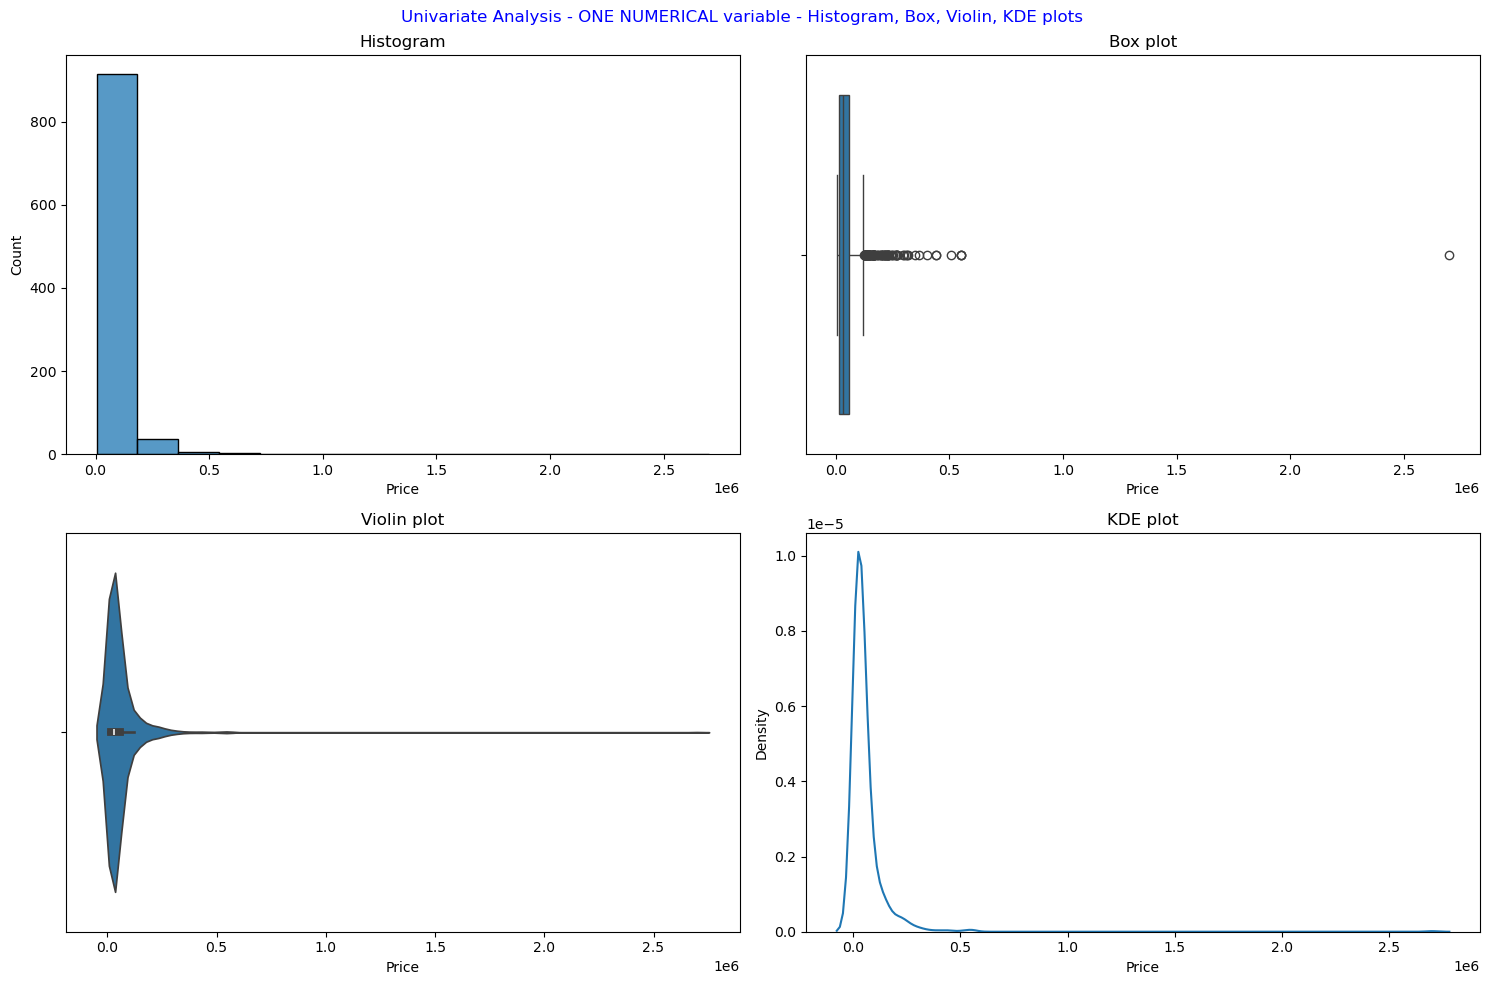

In [87]:
# PLots with ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
plt.suptitle("Univariate Analysis - ONE NUMERICAL variable - Histogram, Box, Violin, KDE plots ", color = "b")

sns.histplot(data=df, x ="Price", bins = 15, ax = axs[0,0])
axs[0,0].set_title("Histogram")

sns.boxplot(data=df, x ="Price", ax = axs[0,1])
axs[0,1].set_title("Box plot")

sns.violinplot(data=df, x ="Price", ax = axs[1,0])
axs[1,0].set_title("Violin plot")

sns.kdeplot(data=df, x ="Price", ax = axs[1,1])
axs[1,1].set_title("KDE plot")

plt.tight_layout() 
plt.show();

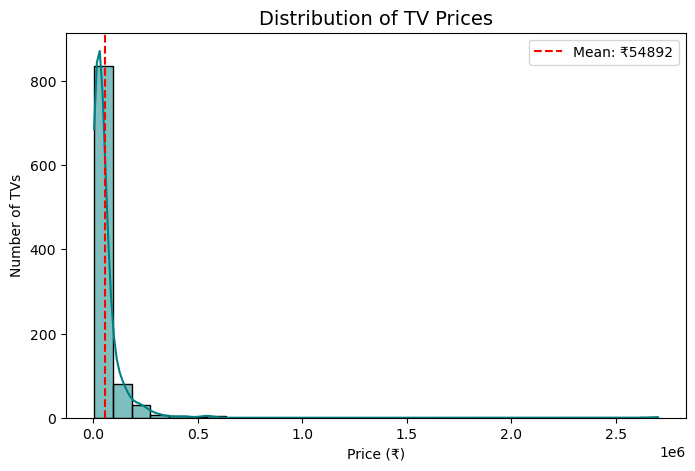

Mean Price: ₹ 54892.69
Median Price: ₹ 31319.0
Mode Price: ₹ 8999


In [88]:
# Histogram of TV Prices
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True, bins=30, color='teal')
plt.title("Distribution of TV Prices", fontsize=14)
plt.xlabel("Price (₹)")
plt.ylabel("Number of TVs")
plt.axvline(df['Price'].mean(), color='red', linestyle='--', label=f"Mean: ₹{int(df['Price'].mean())}")
plt.legend()
plt.show()

# Central tendency
print("Mean Price: ₹", round(df['Price'].mean(), 2))
print("Median Price: ₹", round(df['Price'].median(), 2))
print("Mode Price: ₹", df['Price'].mode()[0])


### Price Distribution

**Observation:** 
- Most TVs are priced between ₹15,000 and ₹60,000, with a sharp concentration in the ₹25K–₹35K range.
- Only a few premium models exceed ₹1 lakh.

**Interpretation:**
- The market is price-sensitive, dominated by mid-range smart TVs that balance affordability and features.

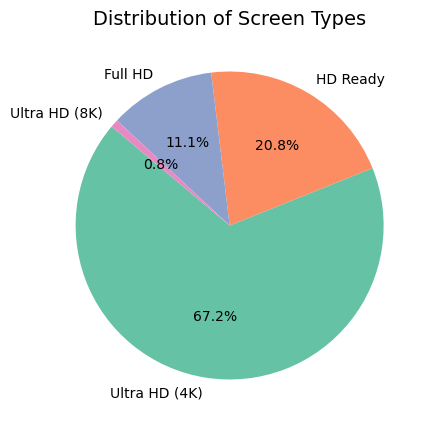

Screen Type Frequency:
 screen
Ultra HD (4K)    645
HD Ready         200
Full HD          107
Ultra HD (8K)      8
Name: count, dtype: int64


In [89]:
# Pie Chart of Screen Types
plt.figure(figsize=(7,5))
df['screen'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Distribution of Screen Types", fontsize=14)
plt.ylabel("")
plt.show()

# Count of each category
print("Screen Type Frequency:\n", df['screen'].value_counts())


### Screen Type Popularity

**Observation:**
- “Ultra HD (4K)” TVs make up the largest share of listings (≈70%), followed by Full HD and HD Ready.

**Interpretation:**
- Indicates a strong market shift toward 4K resolution — higher resolution is becoming the new standard even in mid-tier pricing.

---

## Bi-Variate Analysis

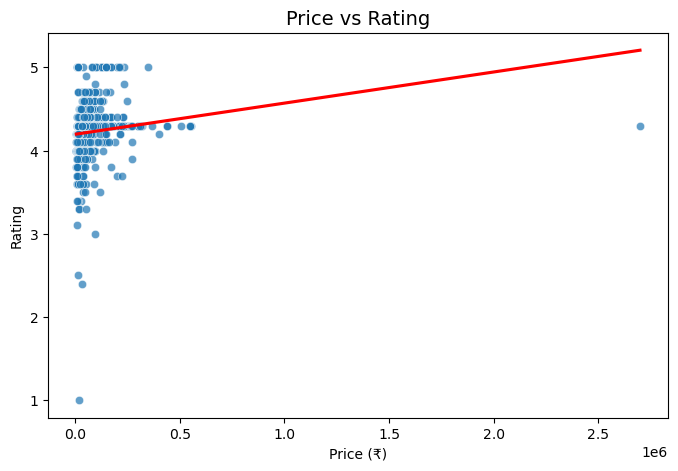

Correlation between Price and Rating: 0.14


In [90]:
# Scatter Plot of Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='rating', data=df, alpha=0.7)
sns.regplot(x='Price', y='rating', data=df, scatter=False, color='red', ci=None)
plt.title("Price vs Rating", fontsize=14)
plt.xlabel("Price (₹)")
plt.ylabel("Rating")
plt.show()

# Correlation coefficient
corr_value = df['Price'].corr(df['rating'])
print(f"Correlation between Price and Rating: {corr_value:.2f}")


### Price vs Rating

**Observation:**
- There is no strong correlation between Price and rating — many affordable TVs (₹10K–₹20K) receive equally high ratings (4.2+).

**Interpretation:**
- Customers value quality and smart features more than premium pricing; expensive doesn’t always mean better satisfaction.

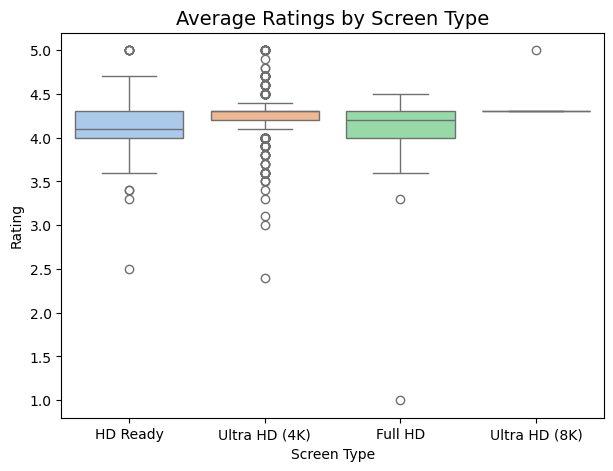

screen
Ultra HD (8K)    4.39
Ultra HD (4K)    4.26
HD Ready         4.13
Full HD          4.10
Name: rating, dtype: float64


In [91]:
# Box Plot of Ratings by Screen Type
plt.figure(figsize=(7,5))
sns.boxplot(x='screen', y='rating', data=df, palette='pastel')
plt.title("Average Ratings by Screen Type", fontsize=14)
plt.xlabel("Screen Type")
plt.ylabel("Rating")
plt.show()

# Summary statistics
print(df.groupby('screen')['rating'].mean().round(2).sort_values(ascending=False))


### Average Rating by Screen Type

**Observation:**
- On average, 4K TVs have slightly higher ratings (~4.3) compared to HD Ready (~4.1) models.

**Interpretation:**
- Indicates that higher resolution and newer models tend to provide a better user experience and meet expectations.

---

## Multi-Variate Analysis

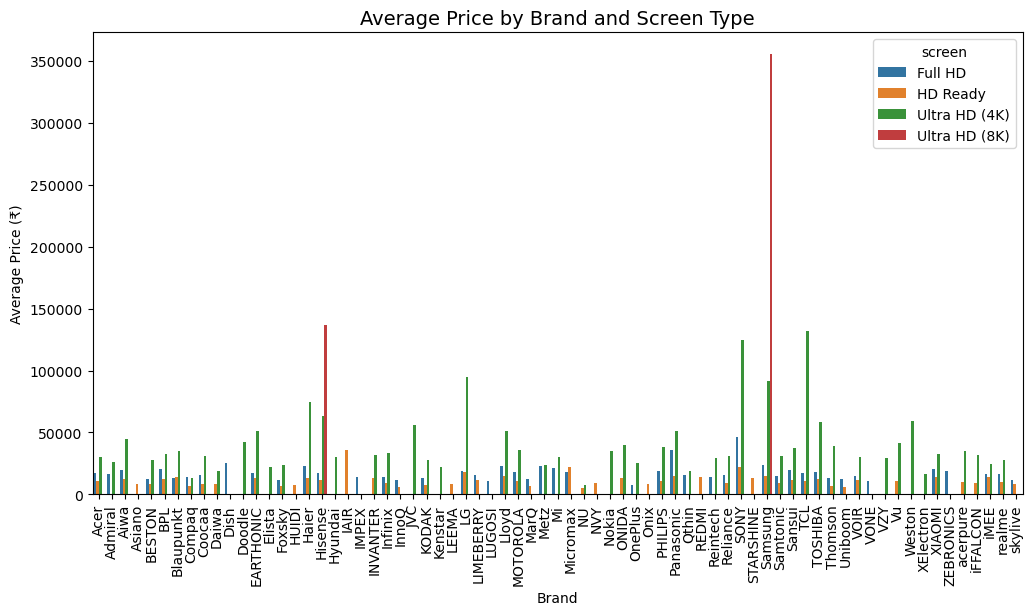

,Brand,screen,Price
109,Samsung,Ultra HD (8K),355278.571429
42,Hisense,Ultra HD (8K),137012.000000
118,TCL,Ultra HD (4K),131699.581818
104,SONY,Ultra HD (4K),124309.021277
61,LG,Ultra HD (4K),94882.642857
108,Samsung,Ultra HD (4K),91324.984252
38,Haier,Ultra HD (4K),74907.857143
41,Hisense,Ultra HD (4K),63189.404762
134,Weston,Ultra HD (4K),58990.000000
121,TOSHIBA,Ultra HD (4K),58095.120000


In [92]:
# Grouped Bar Plot: Brand vs Screen Type vs Avg Price
avg_price = df.groupby(['Brand', 'screen'])['Price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Brand', y='Price', hue='screen', data=avg_price)
plt.title("Average Price by Brand and Screen Type", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Average Price (₹)")
plt.show()

# Top 10 brand-screen pairs
avg_price.sort_values(by='Price', ascending=False).head(10)


### Brand vs Screen Type vs Average Price

**Observation:**
- Premium brands like Sony and Samsung dominate the 4K category with higher average prices (₹60K–₹1L+),
while realme, Foxsky, and Coocaa target the budget HD/Full HD segments (<₹20K).

**Interpretation:**
- Clear market segmentation — different brands cater to different pricing tiers and resolution preferences.

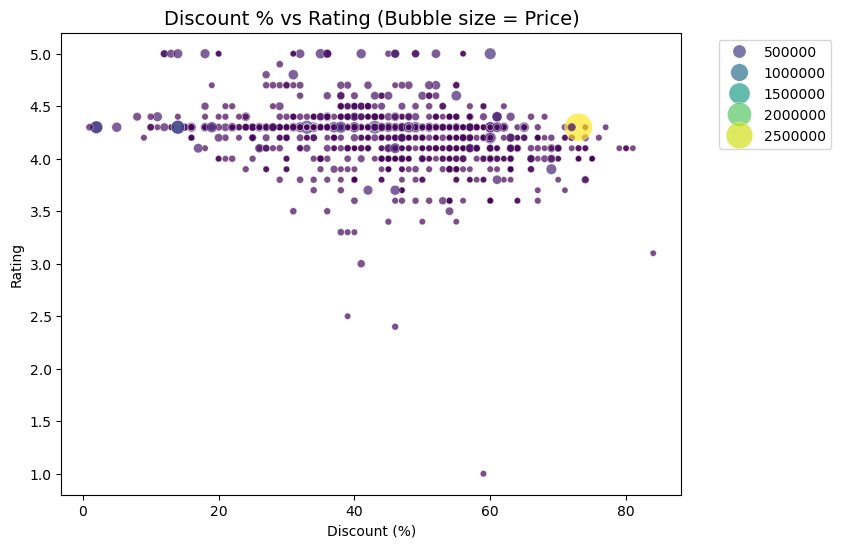

Correlation between Discount and Rating: -0.26


In [93]:
# Prepare discount column (convert '45% off' → 45)
df['Discount_num'] = df['Discount'].str.replace('% off', '', regex=False).astype(float)

# Bubble Plot: Discount vs Rating vs Price
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Discount_num', y='rating', size='Price', sizes=(20, 400),
    hue='Price', data=df, palette='viridis', alpha=0.7
)
plt.title("Discount % vs Rating (Bubble size = Price)", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation check
print("Correlation between Discount and Rating:", df['Discount_num'].corr(df['rating']).round(2))


### Discount %, Price & Ratings Relationship

**Observation:**
- TVs with moderate discounts (30–50%) have the highest average ratings,
whereas those with very high discounts (>70%) often have lower ratings.

**Interpretation:**
- Suggests that excessive discounts may be used to push lower-quality or outdated models, while well-rated products sell with balanced offers.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    960 non-null    object 
 1   Price           960 non-null    int64  
 2   rating          960 non-null    float64
 3   features        960 non-null    object 
 4   pagenum         960 non-null    int64  
 5   original_price  960 non-null    int64  
 6   Discount        960 non-null    object 
 7   Discount_Price  960 non-null    int64  
 8   Review          960 non-null    object 
 9   Brand           960 non-null    object 
 10  screen          960 non-null    object 
 11  no_of_ratings   960 non-null    int64  
 12  no_of_reviews   960 non-null    int64  
 13  year            960 non-null    int64  
 14  Discount_num    960 non-null    float64
dtypes: float64(2), int64(7), object(6)
memory usage: 112.6+ KB


In [95]:
df["screen"].value_counts()

screen
Ultra HD (4K)    645
HD Ready         200
Full HD          107
Ultra HD (8K)      8
Name: count, dtype: int64

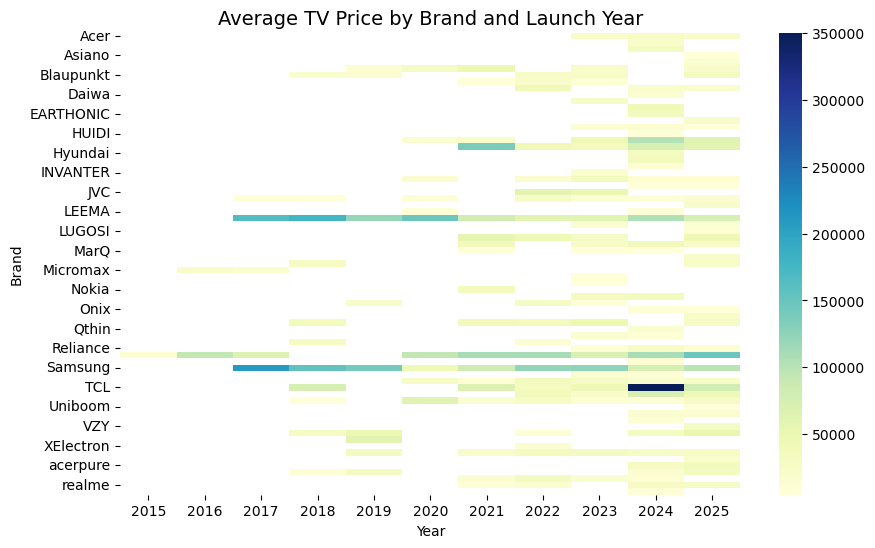

In [96]:
# Create a pivot table of average Price per Brand per Year
pivot_table = df.pivot_table(
    values='Price', 
    index='Brand', 
    columns='year', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, fmt=".0f", cmap='YlGnBu')
plt.title("Average TV Price by Brand and Launch Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Brand")
plt.show()


### Average Price by Brand and Launch Year (Heatmap)

**Observation:**
- Premium brands tend to maintain higher prices across multiple years, whereas certain mid-range brands show noticeable price increases in recent years  indicating product line upgrades and newer technology integration.

**Interpretation:**
- This pattern suggests that established brands maintain consistent pricing strategies, while emerging brands adapt pricing to stay competitive with updated features and screen technologies.

---

### Getting all Numerical Columns from the data

---

In [98]:
df.select_dtypes(include=['number']).columns

Index(['Price', 'rating', 'pagenum', 'original_price', 'Discount_Price',
       'no_of_ratings', 'no_of_reviews', 'year', 'Discount_num'],
      dtype='object')

In [102]:
numeric_cols = ['Price','rating','year']

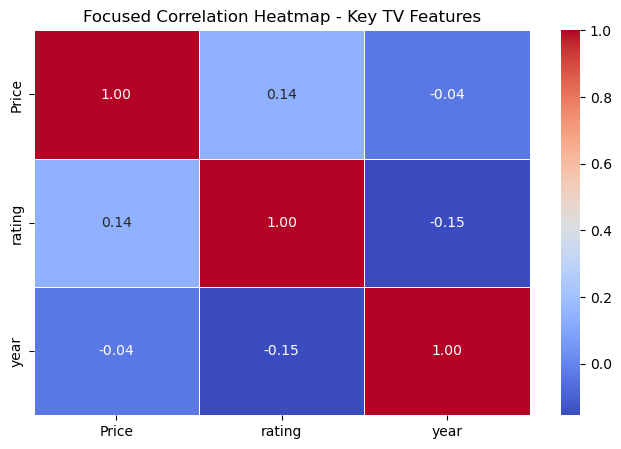

In [104]:
# Filter the dataset
corr_df = df[numeric_cols].corr()

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Focused Correlation Heatmap - Key TV Features")
plt.show()

### 1.Price vs Rating → ( +0.14 )
- There is a very weak positive correlation between TV price and user ratings.
- **Interpretation:**
    - Slight trend that higher-priced TVs get slightly better ratings, but not strong enough to say price guarantees quality.
    - Customers seem to rate based more on performance, features, or brand experience, not just the cost.

### 2.Price vs Year → ( –0.035 )
- Almost zero correlation, slightly negative.
- **Interpretation:**
    - Year of launch has no significant impact on price.
    - Both newer and older TVs are priced across all ranges — possibly due to discounts, brand strategies, or varying feature sets.

### 3.Rating vs Year → ( –0.15 )
- Weak negative correlation.
- **Interpretation:**
    - Newer models tend to have slightly lower average ratings, possibly because:
    - They are recently launched and haven’t accumulated enough ratings yet, or
    - Older models have more reviews and established reputations.

---

### Correlating values for target columns (Price,rating,year)

In [106]:
corr_price = df[numeric_cols].corr()['Price'].sort_values(ascending=False)
print(corr_price)

Price     1.000000
rating    0.140676
year     -0.035293
Name: Price, dtype: float64


In [107]:
corr_rating = df[numeric_cols].corr()['rating'].sort_values(ascending=False)
print(corr_rating)

rating    1.000000
Price     0.140676
year     -0.154602
Name: rating, dtype: float64


In [108]:
corr_year = df[numeric_cols].corr()['year'].sort_values(ascending=False)
print(corr_year)

year      1.000000
Price    -0.035293
rating   -0.154602
Name: year, dtype: float64


---

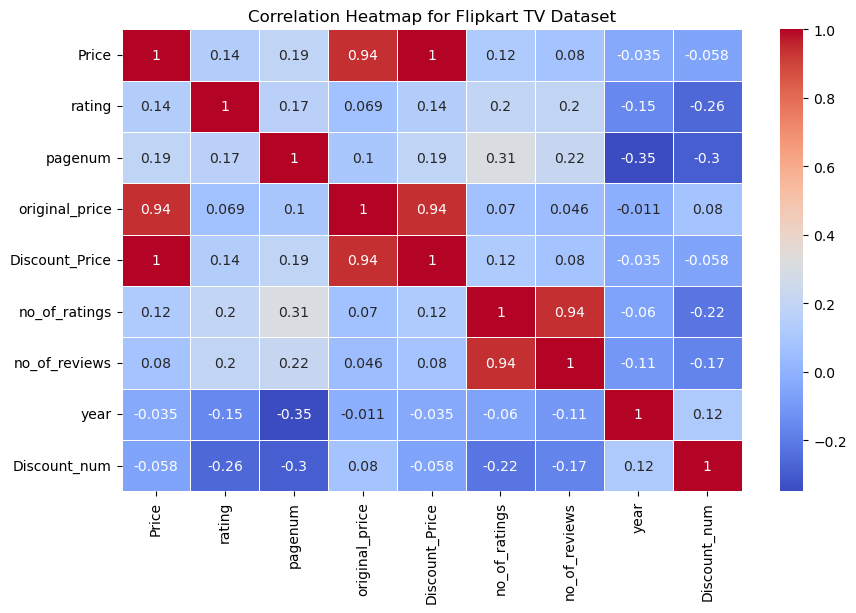

In [97]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Flipkart TV Dataset")
plt.show()

---

## Overall Final Summary
- **Data Understanding:**

    - Explored dataset structure, identified categorical and numerical columns such as Brand, Screen Type, Rating, and Price, and reviewed missing values for consistency.

- **Data Cleaning:**

    - Handled missing and inconsistent values in columns like Rating, Discount, and Year.
    - Extracted numeric discount percentages from text format for proper analysis.
    - Standardized categorical entries like Brand and Screen Type for uniformity.

- **Univariate Analysis:** Studied individual columns such as Price, Rating, and Screen Type to understand their distributions and identify outliers or dominant categories.

- **Bivariate Analysis:** Examined relationships between variables like Price vs Rating and Screen Type vs Rating using scatterplots and violin plots to uncover value-performance trends.

- **Multivariate Analysis:** Used heatmaps and bubble plots to visualize interactions among Brand, Screen Type, Price, Discount, and Rating, revealing pricing and performance patterns across categories.

---

## Insights Gained:

- Mid-range TVs dominate the dataset, showing strong consumer preference in this price range.
- Higher ratings are not limited to premium models, suggesting good quality in affordable segments.
- Moderate discounts (30–50%) are associated with better-rated TVs than extreme discounts.
- Premium brands maintain consistent pricing across years, while emerging brands vary more.

---

## Conclusion:

Yes, the TV dataset is now well-prepared for analysis.
- Missing and inconsistent values were identified and handled effectively.
- Discounts were standardized into numeric format for accurate comparison.
- Exploratory analyses (univariate, bivariate, multivariate) were successfully performed.
- The dataset is now clean, structured, and ready for deeper business insights and visualization.

---